<a href="https://colab.research.google.com/github/RoshanJamthe/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

# <b><u>Data Wrangling

## Dataset Loading

In [47]:
# Importing Data Wrangling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
import time

import warnings
warnings.simplefilter("ignore")

In [120]:
# This helps to show all the columns
pd.set_option('display.max_columns', 200)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Almabetter/Capstone project/ML/Bank Marketing Effectiveness Prediction/bank-full.csv",delimiter=';')

In [50]:
# View the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



####After having a first look at the data, we certainly need data encoding, handling missing values (unkown are nothing but the missing values)



In [51]:
df.replace('unknown',np.nan,inplace=True)

In [52]:
# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB




#### 'poutcome' has nearly 80% missing values, 'job','education' and 'contact' has their share



In [53]:
# Describe the features
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000



#### There is a large variation in the 'balance','duration','campaign','pdays', as well as 'previous' feature.

#### 5 out of 6 features seems to have outliers



In [54]:
# Get unique values from each feature
def unique_values(df):
  for col in df.columns:
    print(f'{col} : {df[col].unique()}')
    print("-*-"*30)

unique_values(df)    

age : [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
job : ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
marital : ['married' 'single' 'divorced']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
education : ['tertiary' 'secondary' nan 'primary']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
default : ['no' 'yes']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
balance : [ 2143    29     2 ...  8205


####* There is no mismatched data 

## Check for Duplicated data 

In [55]:
df.duplicated().sum()

0



####* The dataset has 0 duplicate rows




## nan/missing value handling

In [56]:
# Missing Value Count Function for the dataframe
def show_missing(df):
    missing = df.columns[df.isnull().any()].tolist()

    # Missing data counts and percentage
    print('Missing Data Count')
    print(df[missing].isnull().sum().sort_values(ascending = False))
    print('--'*50)
    print('Missing Data Percentage')
    print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

    return missing

# Check the missing data for the current data
show_missing(df)

Missing Data Count
poutcome     36959
contact      13020
education     1857
job            288
dtype: int64
----------------------------------------------------------------------------------------------------
Missing Data Percentage
poutcome     81.75
contact      28.80
education     4.11
job           0.64
dtype: float64


['job', 'education', 'contact', 'poutcome']

#### 'poutcome' variable is certainly important since its the impact of the previous campaign, there we need to fill missing spots with appropriate value.

In [75]:
# It's a categorical feature, so we are filling it with -1 which means those people reportedly never attended the campaign.
df['poutcome'].fillna(-1,inplace=True)

###'contact' feature

In [59]:
# Check the unique entries
df['contact'].unique()

array([nan, 'cellular', 'telephone'], dtype=object)

In [60]:
# Check the value count
df['contact'].value_counts()

cellular     29285
telephone     2906
Name: contact, dtype: int64

In [62]:
df[df['contact'].isna()]['y'].value_counts()

no     12490
yes      530
Name: y, dtype: int64

In [63]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

So, here we are in risk of losing ~10% of important data, so let's fill the nan values with 0

In [65]:
df['contact'].fillna(0,inplace=True)

### 'education' feature

In [67]:
# Check the unique entries
df['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [68]:
df[df['education'].isna()]['y'].value_counts()

no     1605
yes     252
Name: y, dtype: int64

Text(0.5, 1.0, 'education distribution')

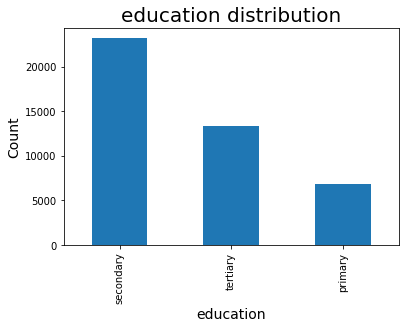

In [69]:
# Get 'education' feature distribution using barplot
df['education'].value_counts().plot.bar()
plt.xlabel('education',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('education distribution',fontsize=20)

In [79]:
# Fill na with mode
df['education'].fillna(df['education'].mode()[0],inplace=True)

###'job' feature

In [71]:
# Check the unique entries
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [72]:
# Check the influence of the 'job' feature
df[df['job'].isna()]['y'].value_counts()

no     254
yes     34
Name: y, dtype: int64

####let's drop all such nan rows, since they are so few.

In [74]:
# Let's get only non nan valued 'job' rows
df = df[~df['job'].isna()]

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44923 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        44923 non-null  int64 
 1   job        44923 non-null  object
 2   marital    44923 non-null  object
 3   education  44923 non-null  object
 4   default    44923 non-null  object
 5   balance    44923 non-null  int64 
 6   housing    44923 non-null  object
 7   loan       44923 non-null  object
 8   contact    44923 non-null  object
 9   day        44923 non-null  int64 
 10  month      44923 non-null  object
 11  duration   44923 non-null  int64 
 12  campaign   44923 non-null  int64 
 13  pdays      44923 non-null  int64 
 14  previous   44923 non-null  int64 
 15  poutcome   44923 non-null  object
 16  y          44923 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


#### We have taken care of all the missing values! pheww!

## Outliers treatment

In [82]:
# Get numerical value features
numerical_features = df.describe().columns
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

### Bivariate inspection

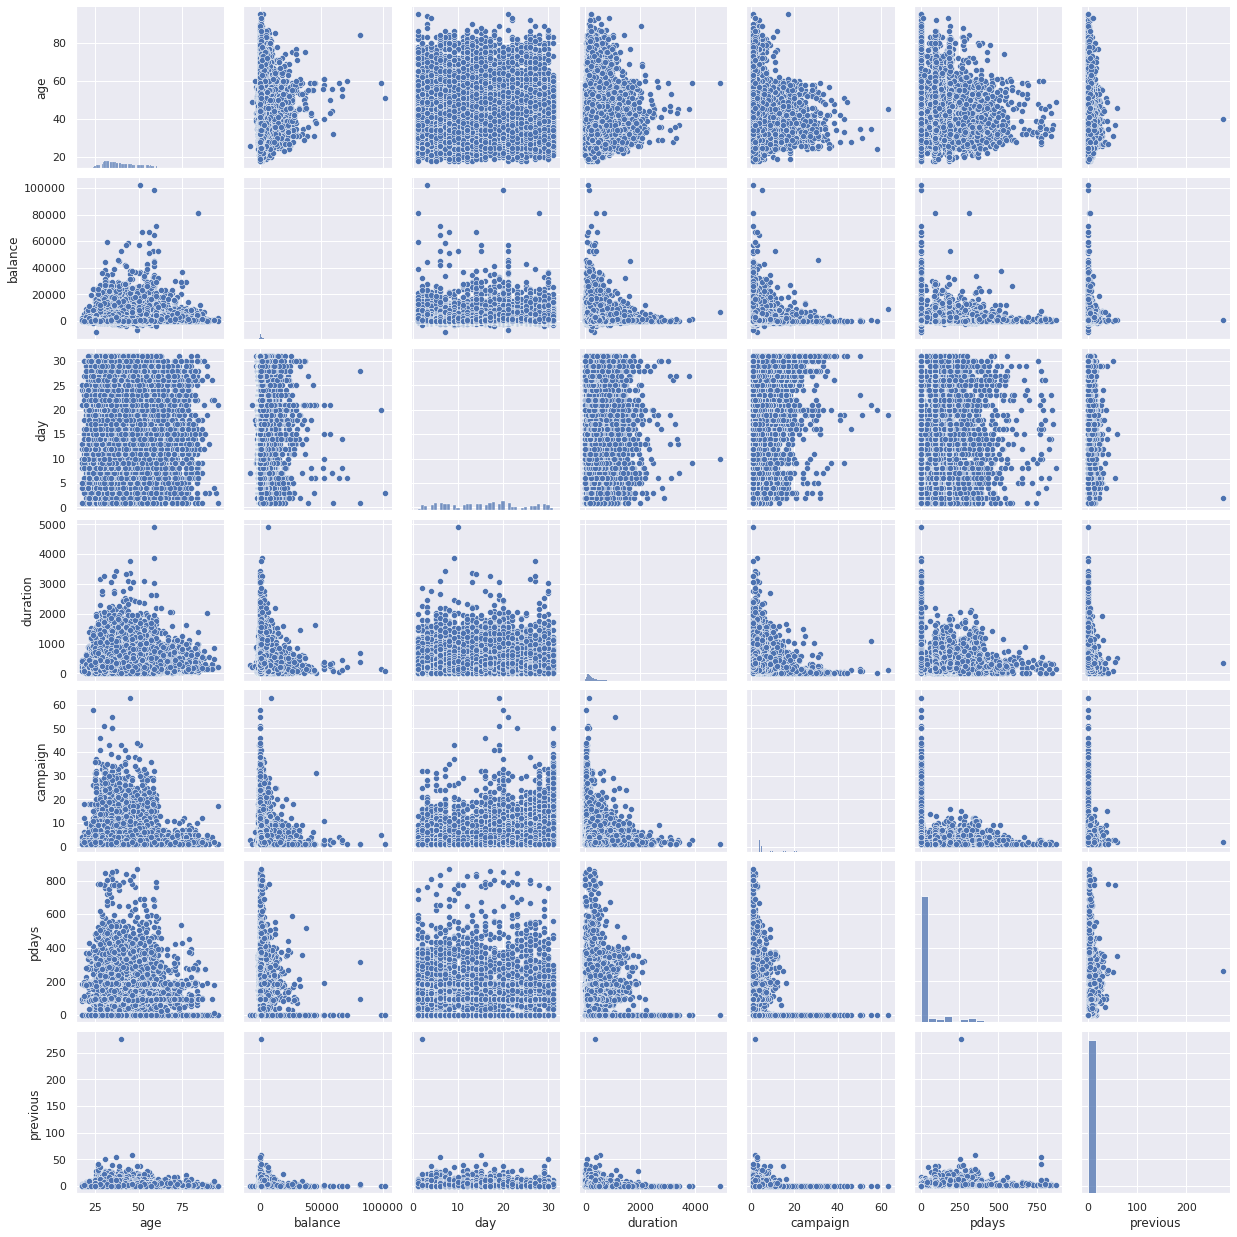

In [84]:
#pairplot
sns.set()
sns.pairplot(df[numerical_features], size = 2.5)
plt.show()

####(balance, duration, campaign, pdays, previous) all this features have serious outlier problem.

#### Let's view it close with distplot from seaborn

### Univariate inspection

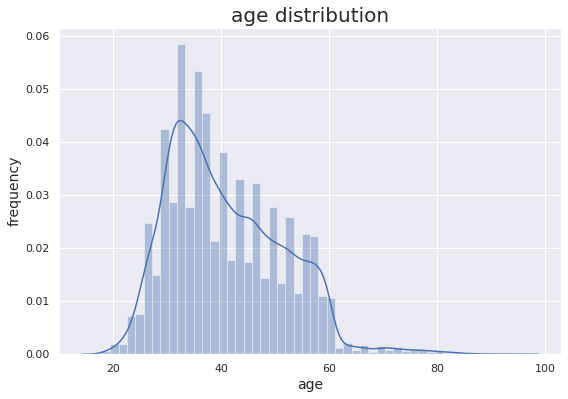

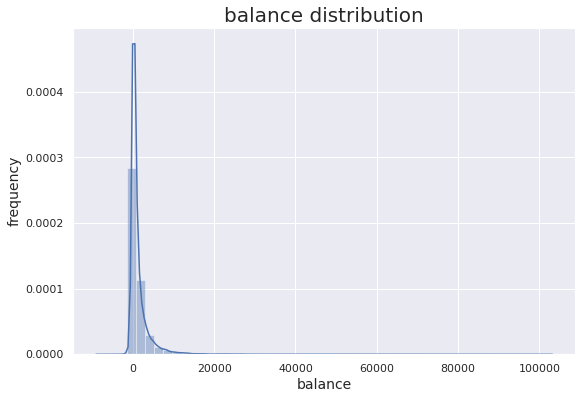

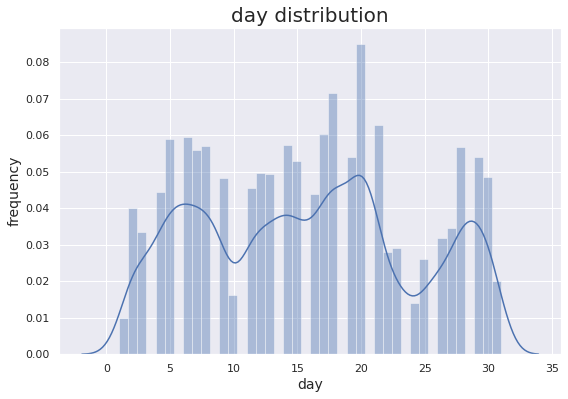

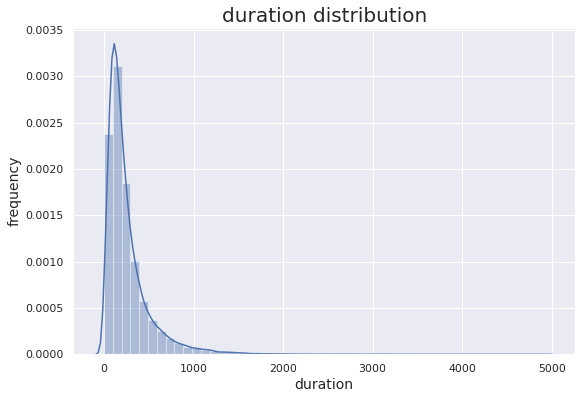

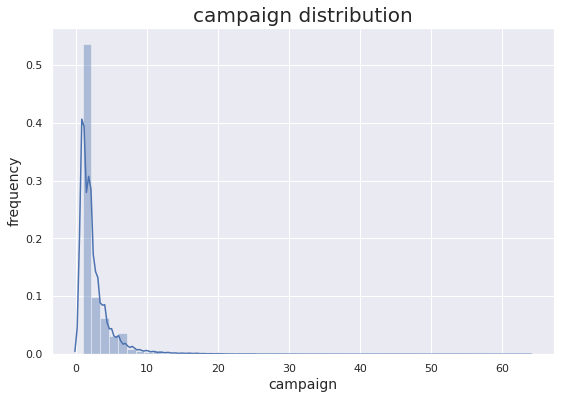

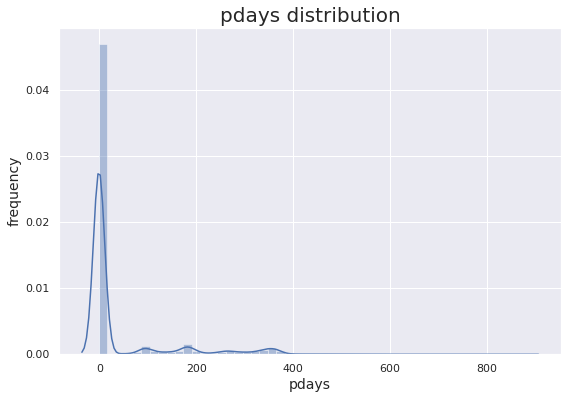

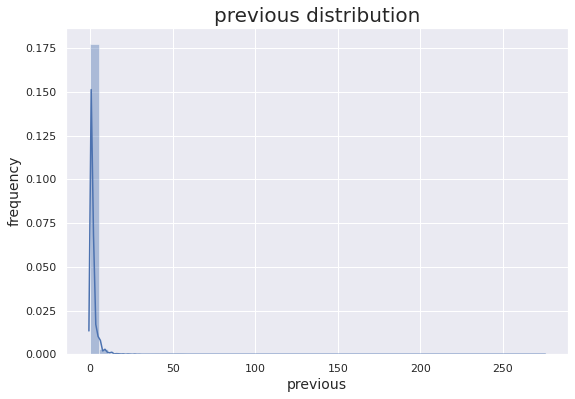

In [87]:
def get_distplot(df,col_list):
  for col in col_list:
    # Get feature distribution using distplot
    plt.figure(figsize=(9,6))
    sns.distplot(df[col])
    plt.xlabel(col,fontsize=14)
    plt.ylabel('frequency',fontsize=14)
    plt.title(f'{col} distribution',fontsize=20)

# Get the plot
get_distplot(df,numerical_features)

### Outliers capping
These features are positively skewed, so we will be talking about limit on upper side only

In [93]:
#Let's set outliers limit
for col in numerical_features:
  print(f'{col} : {df[col].quantile(.99)}')

age : 71.0
balance : 13159.119999999995
day : 31.0
duration : 1270.5599999999977
campaign : 16.0
pdays : 370.0
previous : 9.0


#### This limit seems pretty reasonable, so let's keep only 99% of variance

In [94]:
#Let's set outliers limit
for col in numerical_features:
  upper_limit = df[col].quantile(.99)
  df = df[df[col]<=upper_limit]  

In [95]:
# Check the updated dataframe shape
df.shape

(42451, 17)

## Feature Encoding

In [101]:
# Rename the target feature
df = df.rename(columns={'y':'Target'})

In [103]:
# Get categorical features
categorical_features = df.describe(include='object').columns
categorical_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'Target'],
      dtype='object')

In [104]:
# Get unique values of the categorical features
for col in categorical_features:
  print(f'{col} : {df[col].unique()}')
  print('**'*40)

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
********************************************************************************
marital : ['married' 'single' 'divorced']
********************************************************************************
education : ['tertiary' 'secondary' 'primary']
********************************************************************************
default : ['no' 'yes']
********************************************************************************
housing : ['yes' 'no']
********************************************************************************
loan : ['no' 'yes']
********************************************************************************
contact : [0 'cellular' 'telephone']
********************************************************************************
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
**************

Let's apply following steps to encode each variable in above list,

job : dummy variables

marital : dummy variables

education : ordinal mapping  (primary =1, secondary =2, tertiary=3)

default, housing, loan : binary mapping (no =0, yes =1)

contact :  dummy variables

month : ordinal mapping  (jan =1, feb =2, ... , dec =12)

poutcome : binary mapping (failure =0, success =1) 

Target : binary mapping (no =0, yes =1)

### Dummy variables 
For job, maritial, contact variables

In [117]:
# Get dummy variables for the intended variables
df = pd.get_dummies(df, columns=["job", "marital","contact"])

### 'poutcome' feature 

In [105]:
df['poutcome'].value_counts()

-1         35306
failure     4343
other       1528
success     1274
Name: poutcome, dtype: int64

#### 'other' category significance is unclear so we will delete those rows

In [107]:
# other category has no defined significance, hence we are dropping those rows
df = df[df['poutcome']!='other']

In [109]:
# Discrete conversion nan to -1, failure to 0, success to 1
df['poutcome'] = df['poutcome'].map({'failure':0,'success':1})

In [114]:
df['poutcome'].fillna(-1,inplace=True)

Text(0.5, 1.0, 'poutcome distribution')

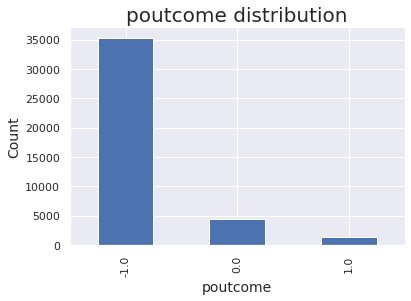

In [115]:
# Get 'poutcome' feature distribution using barplot
df['poutcome'].value_counts().plot.bar()
plt.xlabel('poutcome',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('poutcome distribution',fontsize=20)

### One hot encoding
The rest categorical variables

In [118]:
# Use a dictionary and replace function
encoders_nums = {
                  "education":{"primary":1,"secondary":2,"tertiary":3},
                 "default":{"yes":1,"no":0},
                 "housing":{"yes":1,"no":0},
                 "loan":{"yes":1,"no":0},
                 "month":{"jan":1, "feb":2, "mar":3, "apr":4, "may":5, "jun":6, "jul":7, "aug":8, "sep":9, "oct":10, "nov":11, "dec":12},
                 "Target":{"yes":1,"no":0}}

df = df.replace(encoders_nums)         

In [121]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,contact_0,contact_cellular,contact_telephone
0,58,3,0,2143,1,0,5,5,261,1,-1,0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
1,44,2,0,29,1,0,5,5,151,1,-1,0,-1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,33,2,0,2,1,1,5,5,76,1,-1,0,-1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,47,2,0,1506,1,0,5,5,92,1,-1,0,-1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
5,35,3,0,231,1,0,5,5,139,1,-1,0,-1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0


#### Great! Now, we have all the features in the numeric format.

## Multicollinearity Check

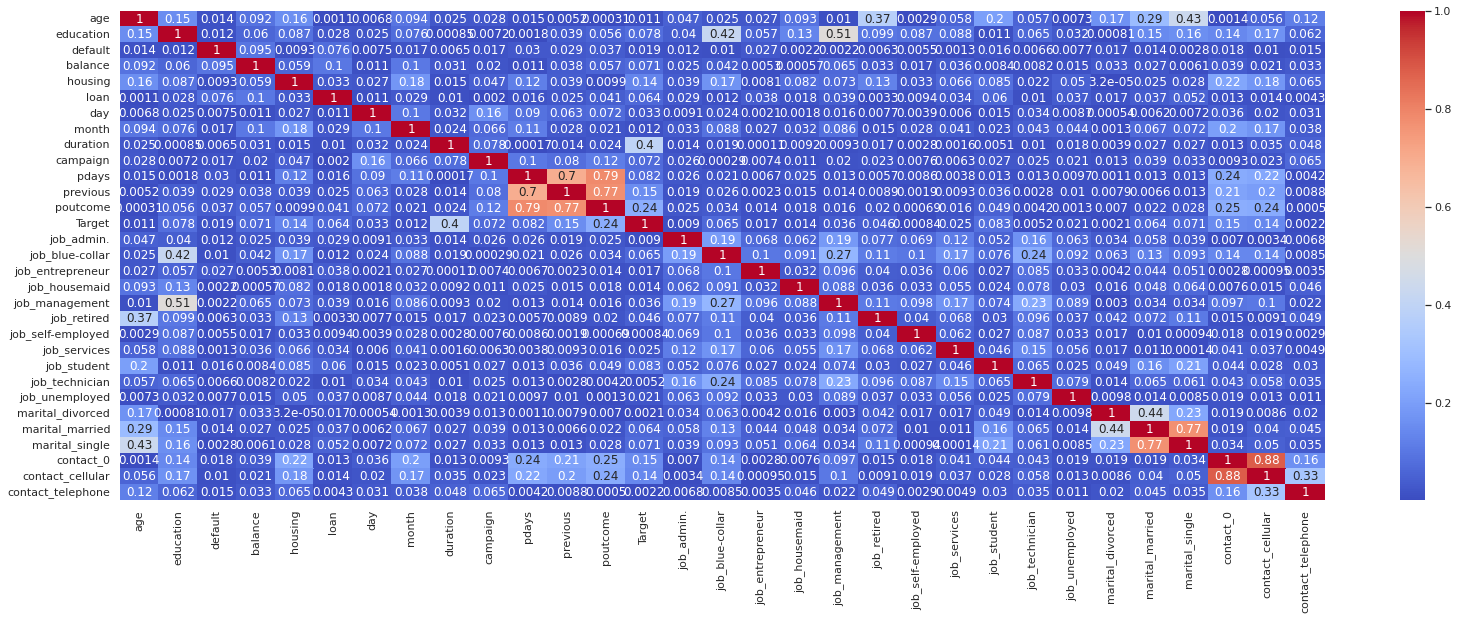

In [123]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(27,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

#### Okay! some variables look collinear with each other, let's inspect it with variance_inflation_factor

In [124]:
# import variance_inflation_factor 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [125]:
# Create a function to return VIF value for that feature
def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame() # create a DataFrame where we will add feature and its respective vif value
    vif["variables"] = X.columns # Variable feature in vif dataframe will have columns from X i.e. input
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] # vif value for that column 
    return(vif)

In [126]:
# Check the vif for the features of the current dataframe
calc_vif(df[[i for i in df.describe().columns if i not in ['Target']]])

,variables,VIF
0,age,1.569550
1,education,1.723794
2,default,1.017733
3,balance,1.051640
4,housing,1.197641
5,loan,1.030061
6,day,1.043584
7,month,1.137005
8,duration,1.014798
9,campaign,1.055050


In [129]:
# Select features to reduce strong collinearity
calc_vif(df[[i for i in df.describe().columns if i not in ['Target','marital_single','contact_0','job_management','age']]])

,variables,VIF
0,education,11.185939
1,default,1.036775
2,balance,1.408491
3,housing,2.610390
4,loan,1.232532
5,day,4.684618
6,month,8.037711
7,duration,2.306901
8,campaign,2.360342
9,pdays,3.052346




> We have reduced some strong multicollinearity



#### 3 features namely age, education, poutcome need to be investigated further!

# <b><u>Data Visualization 

In [ ]:
# Build a function to get [box_plot and dist_plot for continuous values feature] and [box_plot and bar_plot for discrete plot]
def get_eda(df,dependent_feature):
  for col in df.columns:

    # Continuous features
    if len(df[col].unique())>20:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(y=df[col])       # Box plot
      fig.set_title('',fontsize=17)
      fig.set_ylabel(col,fontsize=13)
      
      plt.subplot(1, 2, 2)
      fig = sns.distplot(df[col].dropna(),color='purple')  # Dist plot
      fig.set_ylabel('Frequency',fontsize=13)
      fig.set_xlabel(col,fontsize=13)
      plt.title(f'{col} Distribution',fontsize=17)
      plt.show()

    # Categorical features
    else:
      plt.figure(figsize=(15,6))
      plt.subplot(1, 2, 1)
      fig = sns.boxplot(df[col],df[dependent_feature])  # Box plot
      fig.set_title('')
      fig.set_ylabel(dependent_feature,fontsize=13)

      plt.subplot(1, 2, 2)
      counts = df[col].value_counts().sort_index()
      counts.plot.bar(color='steelblue')              # Bar plot
      plt.xlabel(col,fontsize=13)
      plt.ylabel('count',fontsize=13)
      plt.title(f'count of {col}',fontsize=17)
      plt.show()      

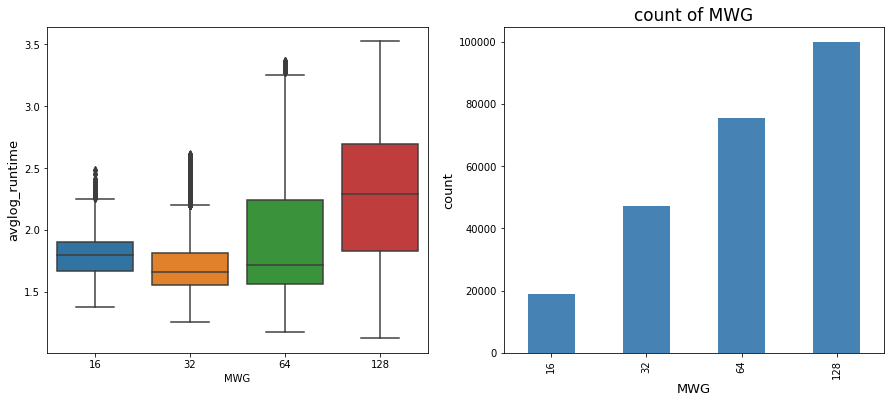

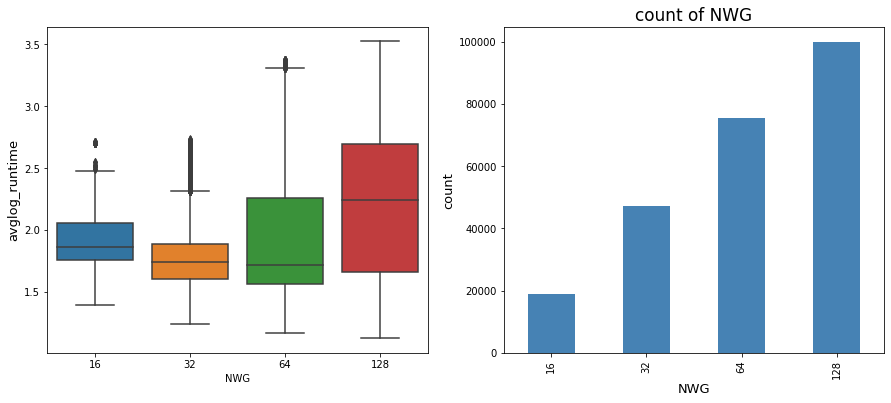

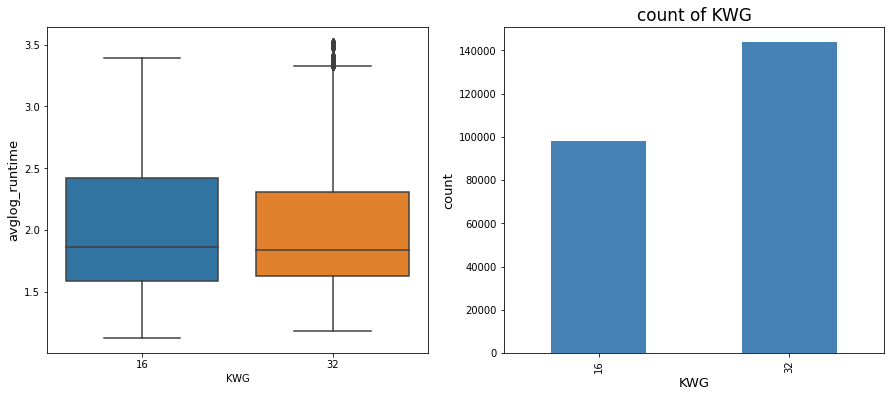

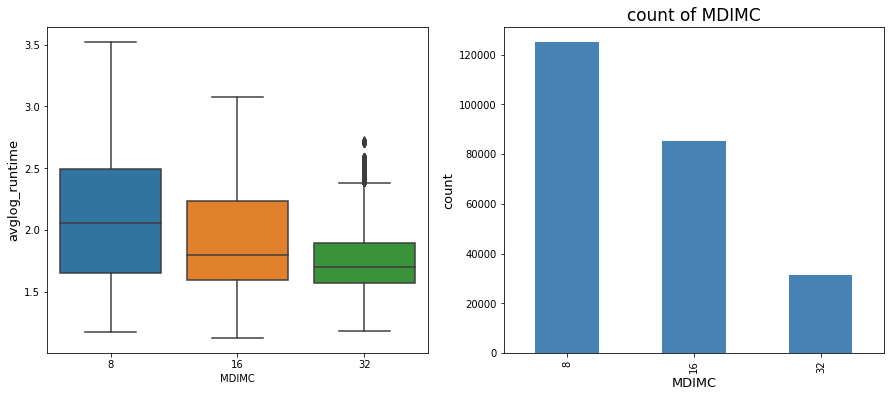

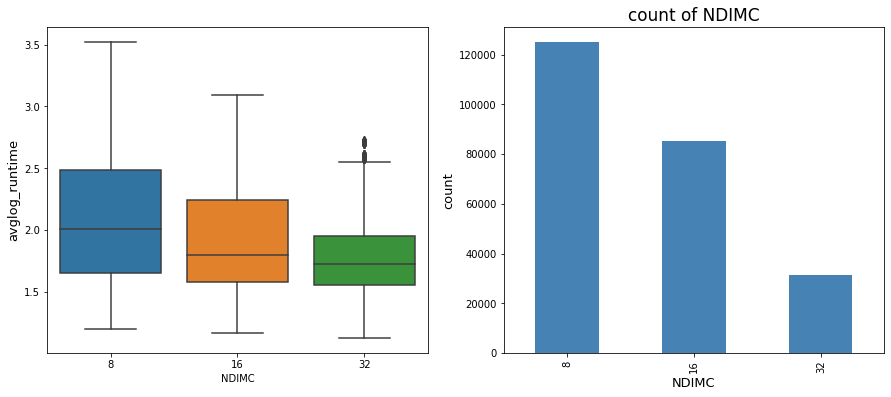

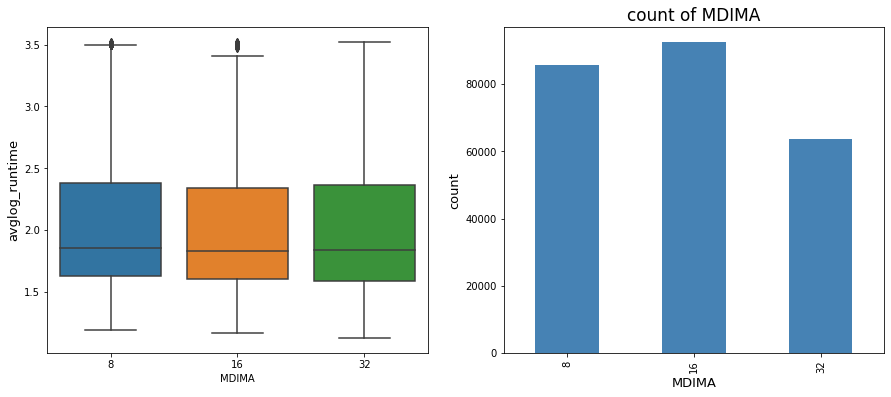

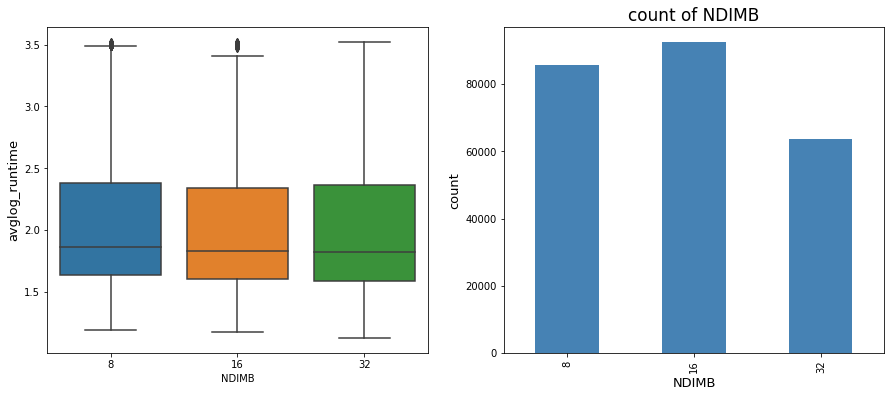

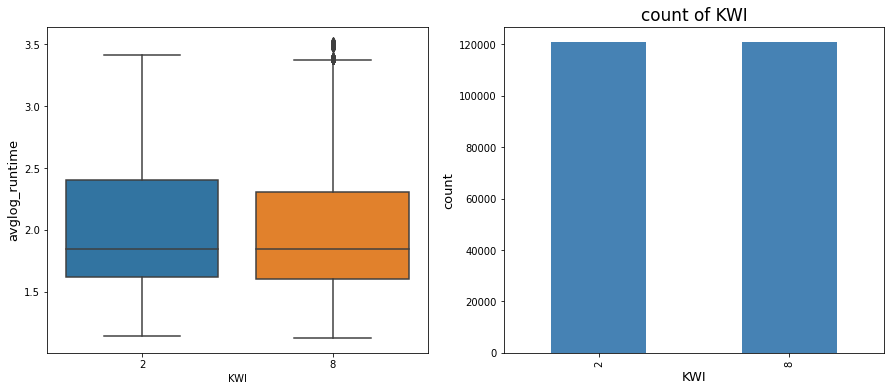

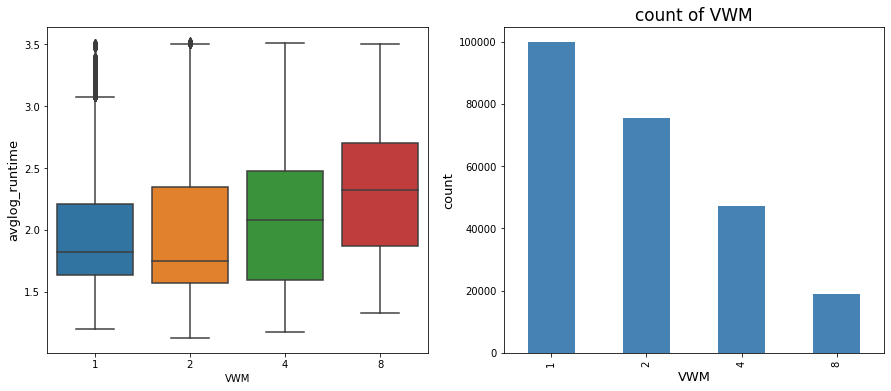

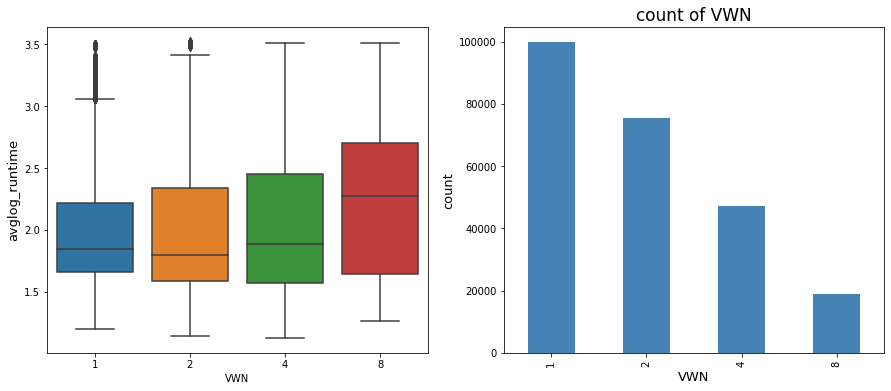

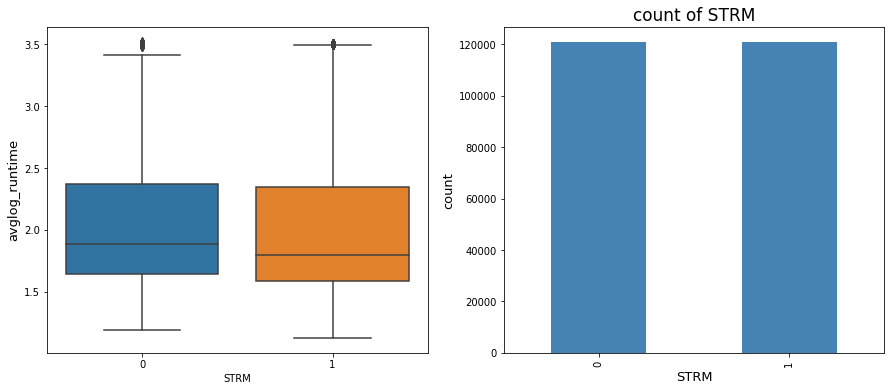

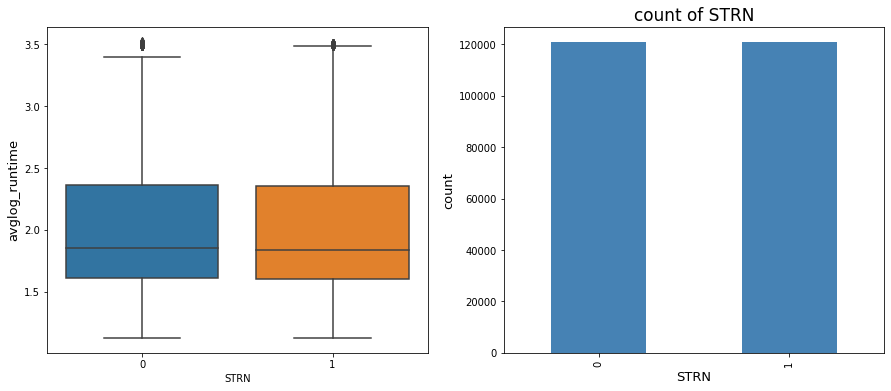

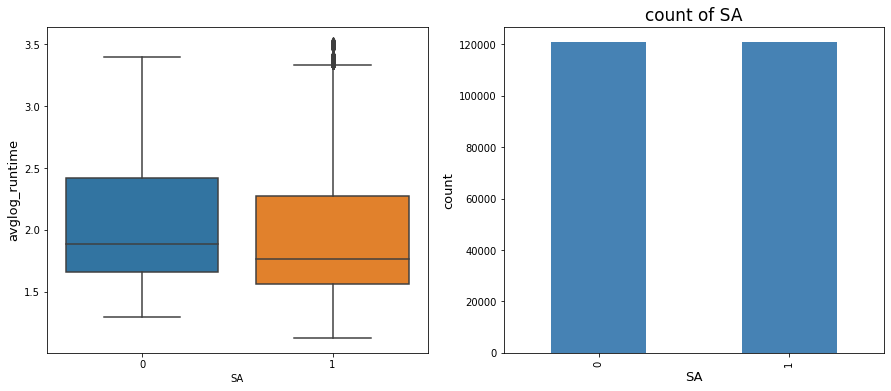

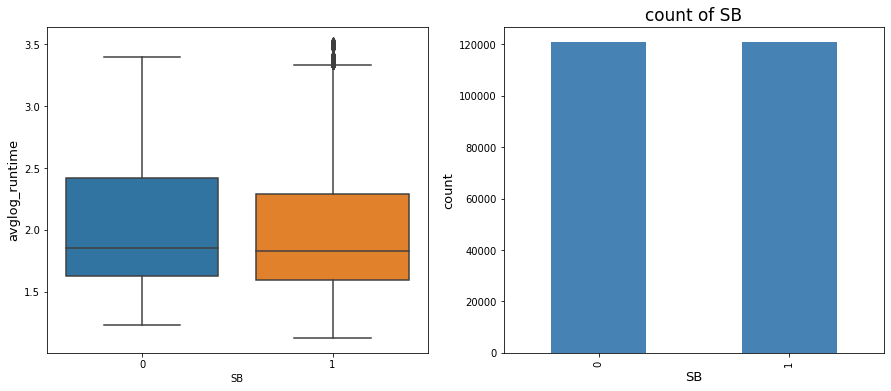

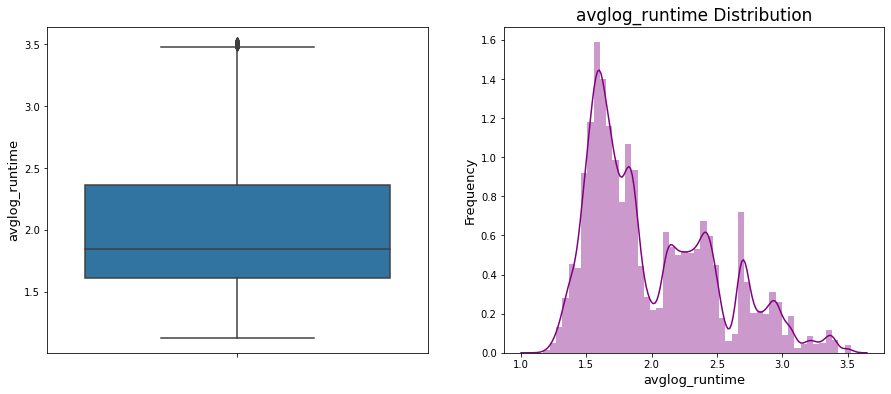

In [ ]:
get_eda(df,'avglog_runtime')



> Data seems well balanced now



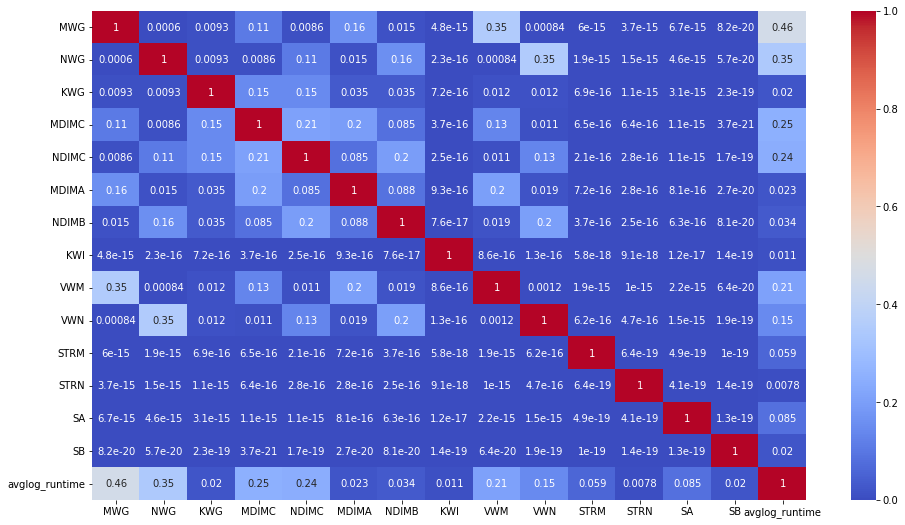

In [ ]:
# Get the heatmap using seaborn.heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')

Correlation between any two independent variables is not concerning.

# <b><u>Train Test Split and preprocessing

## TrainTestSplit

In [133]:
X = df [[i for i in df.columns if i not in ['Target','marital_single','contact_0','job_management','age']]]
y = df['Target']

In [134]:
X.head()

,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,contact_cellular,contact_telephone
0,3,0,2143,1,0,5,5,261,1,-1,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,0,29,1,0,5,5,151,1,-1,0,-1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,0,2,1,1,5,5,76,1,-1,0,-1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,2,0,1506,1,0,5,5,92,1,-1,0,-1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,3,0,231,1,0,5,5,139,1,-1,0,-1.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [135]:
y.head()

0    0
1    0
2    0
3    0
5    0
Name: Target, dtype: int64

In [140]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y, random_state=0)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(32738, 26) (32738,)
(8185, 26) (8185,)


In [141]:
y_train.value_counts()

0    29332
1     3406
Name: Target, dtype: int64

In [142]:
y_test.value_counts()

0    7333
1     852
Name: Target, dtype: int64

In [144]:
3406/29332 , 852/7333

(0.11611891449611346, 0.1161870994136097)

## Standardization (mean=0, s=1) and Normalization [0,1]

In [145]:
from sklearn import preprocessing 

# Standardization
std_scalar = preprocessing.StandardScaler() # The output array contains -ve 0 +ve values

X_train_std = std_scalar.fit_transform(X_train)
X_test_std = std_scalar.fit_transform(X_test)

# <b><u> ML models

## <b><u>Logistic regression model 

### Model Training - LogisticRegression

In [149]:
# Import the library
from sklearn.linear_model import LogisticRegression

# Fitting the LogisticRegression on train data
lr = LogisticRegression(fit_intercept=True)
lr.fit(X_train_std , y_train)

LogisticRegression()

In [150]:
# Get the predicted classes
train_class_preds = lr.predict(X_train_std)
test_class_preds = lr.predict(X_test_std)

In [151]:
# Get score for train and test data
lr.score(X_train_std, y_train) , lr.score(X_test_std, y_test)

(0.9087910073920215, 0.9132559560171044)

###Model Performance

In [154]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [152]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

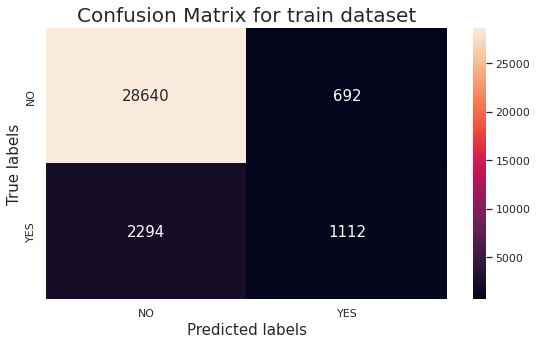

In [155]:
# get confusion matrix for train data
get_confusion_matrix(lr, X_train_std, y_train, 'train')

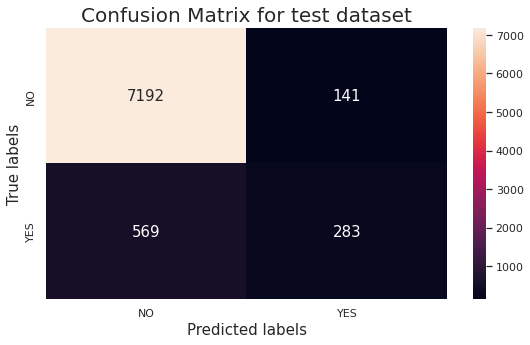

In [156]:
# get confusion matrix for test data
get_confusion_matrix(lr,X_test_std,y_test,'test')

In [160]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [162]:
# Get model performance using function I built, model_performance
individual_model_performance(lr,X_train_std,X_test_std,y_train,y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.426871,0.443574
1,Accuracy,0.908791,0.913256
2,Recall,0.326483,0.332160
3,Precision,0.616408,0.667453
4,log_loss,3.150264,2.996047
5,roc_auc,0.651445,0.656466


### Model Interpretation

In [158]:
# View the coefficient values
def feature_coefficients(model_name,X):
  labels = df.drop('Target',axis=1).columns
  coef = pd.DataFrame(list(zip(labels,model_name.coef_[0])),columns=['Features','Coef'])
  coef['Absolute coef'] = abs(coef['Coef'])
  coef.sort_values('Absolute coef',ascending=False,inplace=True)
  return coef.reset_index(drop=True)

In [159]:
feature_coefficients(lr,X_train_std)

,Features,Coef,Absolute coef
0,month,1.064844,1.064844
1,previous,0.779892,0.779892
2,marital_divorced,0.568928,0.568928
3,campaign,-0.475275,0.475275
4,balance,-0.411835,0.411835
5,marital_married,0.268288,0.268288
6,duration,-0.258910,0.258910
7,housing,-0.225846,0.225846
8,job_unemployed,-0.157262,0.157262
9,age,0.146405,0.146405


## <b><u>XGBClassifier model

### Model Training - XGBClassfier

In [180]:
# Since we need to select the best model out of four, using BayesSeachCV
!pip install scikit-optimize

In [181]:
# To get best values of hyperparameters use BayesSearch crossvalidation
from skopt import BayesSearchCV

In [182]:
from sklearn import ensemble
from xgboost import XGBClassifier

In [184]:
start = time. time()

# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(subsample=0.9, colsample_bytree =0.4,random_state=0)

# Grid search
xgb_bayes= BayesSearchCV(estimator=xgb_model,
                       search_spaces = {'max_depth': (5,25),
                                    'min_samples_weight': (0.8,1),
                                    'reg_alpha':(0.01,10), 'gamma':(0.1,1)}, n_iter=20,
                       cv = 4, verbose=2, scoring='recall')
# Fit the data
xgb_bayes.fit(X_train_std,y_train)

end = time. time()
print(f'Time taken to find optimal parameters using Bayes search is {(end - start)/60} minutes')

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.6864807725669985, max_depth=22, min_samples_weight=0.9281130758279303, reg_alpha=4.930129137950534; total time=   5.8s
[CV] END gamma=0.6864807725669985, max_depth=22, min_samples_weight=0.9281130758279303, reg_alpha=4.930129137950534; total time=   4.4s
[CV] END gamma=0.6864807725669985, max_depth=22, min_samples_weight=0.9281130758279303, reg_alpha=4.930129137950534; total time=   5.5s
[CV] END gamma=0.6864807725669985, max_depth=22, min_samples_weight=0.9281130758279303, reg_alpha=4.930129137950534; total time=   8.1s
Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV] END gamma=0.46630301225255666, max_depth=13, min_samples_weight=0.8481663393381587, reg_alpha=1.9109041455560953; total time=   6.0s
[CV] END gamma=0.46630301225255666, max_depth=13, min_samples_weight=0.8481663393381587, reg_alpha=1.9109041455560953; total time=   5.1s
[CV] END gamma=0.46630301225255666, max_depth=13, min_samples_

In [185]:
# Get best estimators from the cross validation results
xgb_bayes.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.46630301225255666, max_depth=13,
              min_samples_weight=0.8481663393381587,
              reg_alpha=1.9109041455560953, subsample=0.9)

In [186]:
# Create a optmial XGBoost model
xgb_bayes_optimal = xgb_bayes.best_estimator_

In [190]:
# Get the score on both train and test data
xgb_bayes_optimal.score(X_train_std,y_train),xgb_bayes_optimal.score(X_test_std,y_test)

(0.9505773107703586, 0.9160659743433109)

### Model Performance

In [191]:
# Performance metrics for classification problem
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

In [192]:
# Get the confusion matrix and label it
def get_confusion_matrix(model_name, X, y,label):
  test_class_preds = model_name.predict(X)
  plt.figure(figsize=(9,5))
  labels = ['NO', 'YES']
  cm = confusion_matrix(y, test_class_preds)
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d',annot_kws={"size":15}); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels',fontsize=15)
  ax.set_ylabel('True labels',fontsize=15)
  ax.set_title(f'Confusion Matrix for {label} dataset',fontsize=20)
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

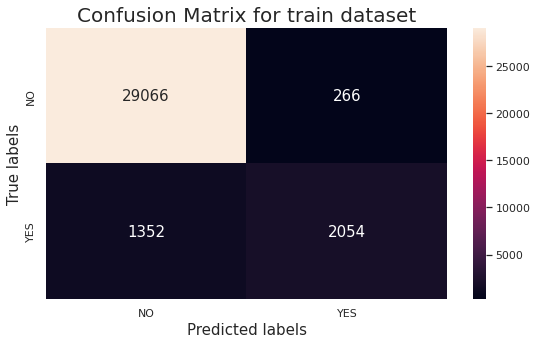

In [193]:
# Get confusion matrix for train data
get_confusion_matrix(xgb_bayes_optimal,X_train_std,y_train,'train')

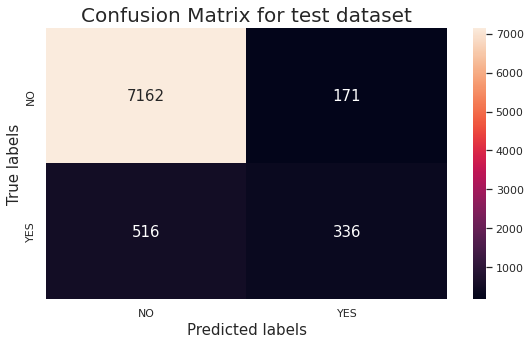

In [194]:
# Get confusion matrix for test data
get_confusion_matrix(xgb_bayes_optimal,X_test_std,y_test,'test')

In [195]:
# Get the accuracy score for the individual model
def individual_model_performance(model_name,X_train,X_test,y_train,y_test):

  # Get the predicted classes
  train_class_preds = model_name.predict(X_train)
  test_class_preds = model_name.predict(X_test)

  # Will need these libraries
  from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score,log_loss,roc_auc_score, confusion_matrix

  # Get train scores
  train_f_score = f1_score(y_train,train_class_preds)
  train_accuracy = accuracy_score(y_train,train_class_preds)
  train_recall = recall_score(y_train,train_class_preds)
  train_precision = precision_score(y_train,train_class_preds)
  train_log_loss = log_loss(y_train,train_class_preds)
  train_roc_auc = roc_auc_score(y_train,train_class_preds)

  # Get test scores
  test_f_score = f1_score(y_test,test_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)
  test_recall = recall_score(y_test,test_class_preds)
  test_precision = precision_score(y_test,test_class_preds)
  test_log_loss = log_loss(y_test,test_class_preds)
  test_roc_auc = roc_auc_score(y_test,test_class_preds)

  # Prepare a metric dataframe
  metric = ('f_score', 'Accuracy', 'Recall', 'Precision', 'log_loss','roc_auc')
  train_metric = [train_f_score, train_accuracy, train_recall, train_precision, train_log_loss, train_roc_auc]
  test_metric = [test_f_score, test_accuracy, test_recall, test_precision, test_log_loss, test_roc_auc]

  metrics = pd.DataFrame(list(zip(metric,train_metric,test_metric)), columns = ['Metric','Performance on Train Data', 'Performance on Test Data'])
  return metrics

In [196]:
# Get the model performance
individual_model_performance(xgb_bayes_optimal, X_train_std, X_test_std, y_train, y_test)

,Metric,Performance on Train Data,Performance on Test Data
0,f_score,0.717429,0.494481
1,Accuracy,0.950577,0.916066
2,Recall,0.603053,0.394366
3,Precision,0.885345,0.662722
4,log_loss,1.707006,2.898995
5,roc_auc,0.796992,0.685523


In [204]:
# Create a function to get feature importance of random forest model
def get_feature_importance(model_name,X_train,df_for_columns):
  importances = model_name.feature_importances_

  importance_dict = {'Feature' : df_for_columns.columns,
                    'Feature Importance' : importances}

  importance_df = pd.DataFrame(importance_dict)
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],3)
  importance_df.sort_values('Feature Importance',ascending=False,inplace =True)
  importance_df.reset_index(drop=True,inplace=True)
  return importance_df[importance_df['Feature Importance']>0]

In [205]:
# Get feature importances
xgb_feature_importance = get_feature_importance(xgb_bayes_optimal,X_train_std, X_train)
xgb_feature_importance

,Feature,Feature Importance
0,housing,0.201
1,poutcome,0.195
2,contact_cellular,0.179
3,month,0.064
4,duration,0.060
5,job_student,0.029
6,loan,0.025
7,pdays,0.025
8,contact_telephone,0.024
9,day,0.021


### Model Interpretation

In [206]:
# Complex model will be interpreted with SHAP. Install shap 
!pip install shap

     |████████████████████████████████| 564 kB 7.9 MB/s 


In [207]:
import shap

In [208]:
def get_summary_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance)

In [209]:
 def get_summary_bar_plot_BT(model_name,X_test):
  # DF, based on which importance is checked
  X_importance = X_test

  # Explain model predictions using shap library (TreeExplainer is faster than KernalExplainer):
  explainer = shap.TreeExplainer(model_name)
  shap_values = explainer.shap_values(X_importance)

  # Plot summary_plot for Passed 
  shap.summary_plot(shap_values, X_importance, plot_type='bar') 

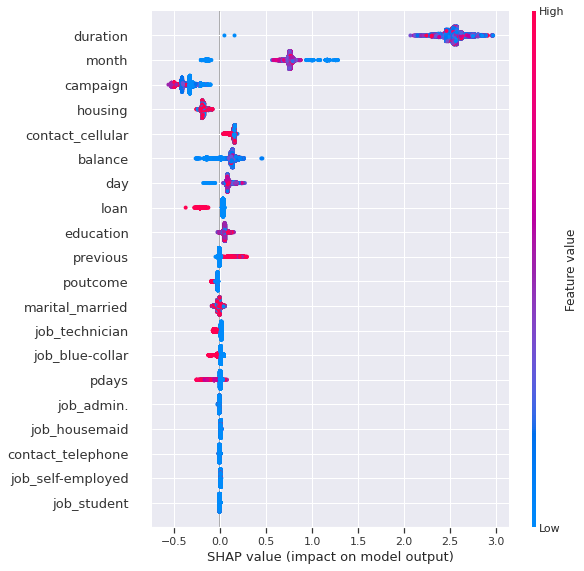

In [212]:
get_summary_plot_BT(xgb_bayes_optimal,X_test)

The noise can be described by this figure,
top 6 features shows how noisy the dataset is.

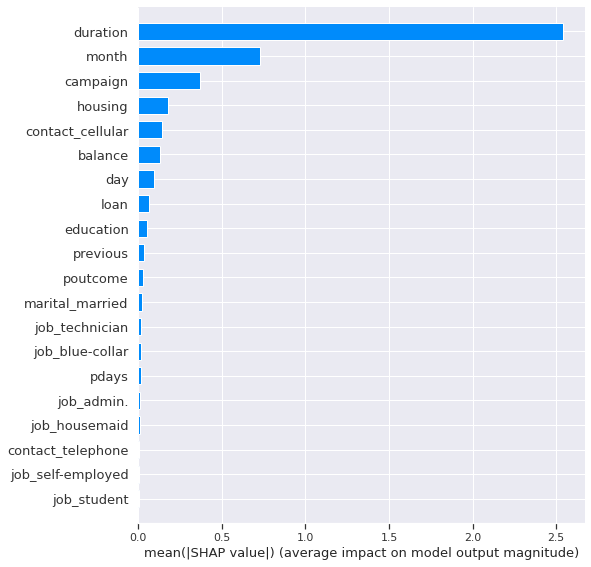

In [213]:
get_summary_bar_plot_BT(xgb_bayes_optimal,X_test)